In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
data = pd.read_csv("data.csv",header =0)
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Outliers

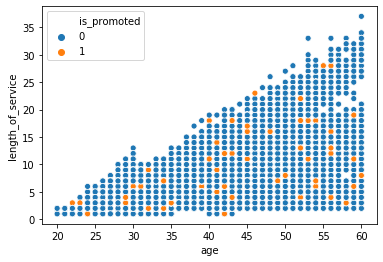

In [3]:
sns.scatterplot(x='age',y='length_of_service',hue='is_promoted',data=data)

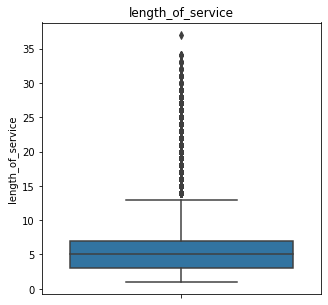

In [4]:
# Box Plot to find more information about it's Quartiles and also detect Outliers
plt.figure(figsize = (5, 5))
plt.title('length_of_service')
sns.boxplot(y = data.length_of_service)

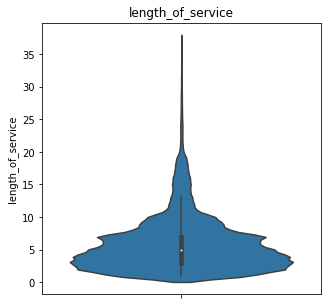

In [5]:
#using violinplot
plt.figure(figsize = (5, 5))
plt.title('length_of_service')
sns.violinplot(y = data.length_of_service)

(3489, 14)


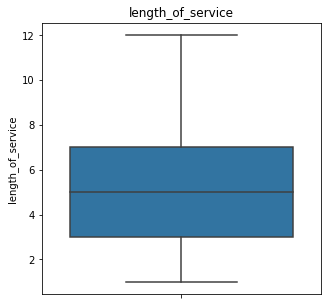

In [6]:
Q1 = data.length_of_service.quantile(0.25)
Q3 = data.length_of_service.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
Data_outliers=data[(data.length_of_service<lower_limit)|(data.length_of_service>upper_limit)]
print(Data_outliers.shape)
data=data[(data.length_of_service>lower_limit)&(data.length_of_service<upper_limit)]#dropping the outliers from dataset
plt.figure(figsize = (5, 5))
plt.title('length_of_service')
sns.boxplot(y = data.length_of_service)

-3.0 13.0


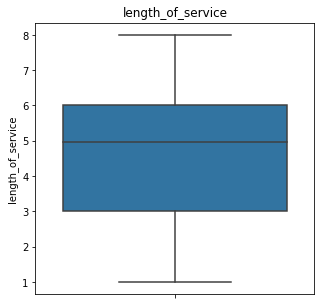

In [7]:
#finding outliers using IQR formula 
#if "Datapoints<Q1-1.5 IQR where Q1=Quantile1" & "Datapoint>Q3+1.5 IQR where Q3=Quantile3"
Q1 = data.length_of_service.quantile(0.25)
Q3 = data.length_of_service.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
mean_values=data['length_of_service'].mean()
data.loc[data.length_of_service > 8.0, 'length_of_service'] = np.nan
data['length_of_service']=data.length_of_service.fillna(mean_values)
plt.figure(figsize = (5, 5))
plt.title('length_of_service')
sns.boxplot(y = data.length_of_service)

In [8]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.00000,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.00000,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.00000,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,4.95809,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2.00000,0,0,73,0


C:\Users\gautam.y.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


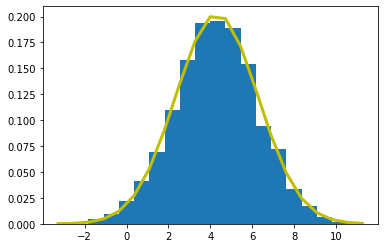

In [10]:
mu=data['length_of_service'].mean()
sigma=data['length_of_service'].std()
count, bins, ignored = plt.hist(s, 20, normed=True)
s = np.random.normal(mu, sigma, 5000)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2) ),linewidth=3, color='y')
plt.show()